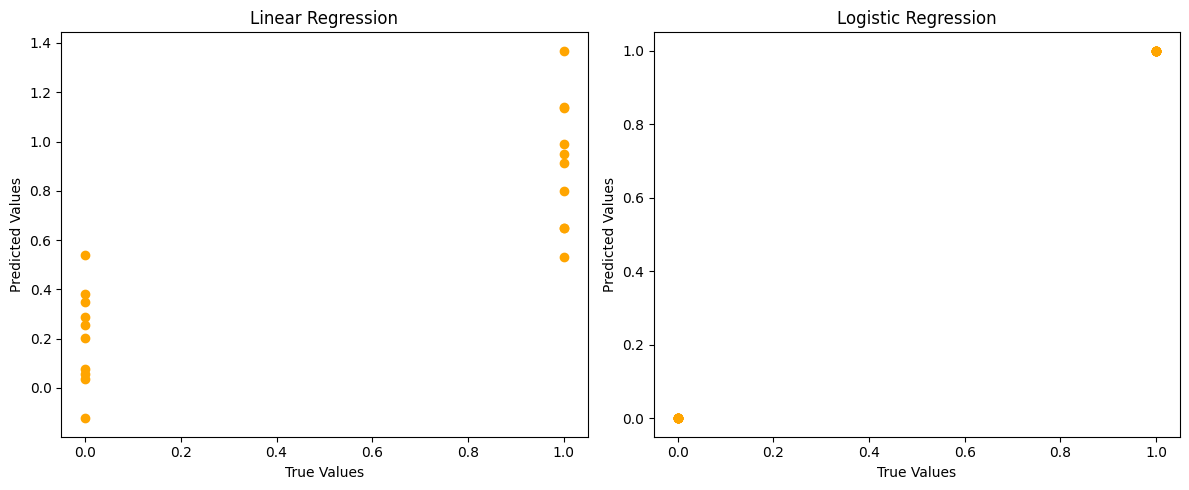

Linear Regression MSE: 0.073
Logistic Regression Accuracy: 1.0
Confusion Matrix:
 [[10  0]
 [ 0 10]]


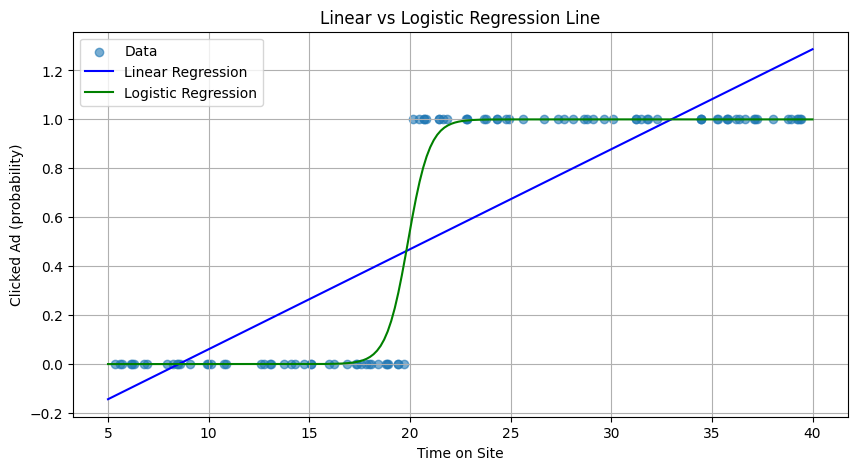

In [13]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# 1. Generate a simple dataset
np.random.seed(0)
n = 100

age = np.random.randint(18, 60, size=n)
time_on_site = np.random.uniform(5, 40, size=n)
from_mobile = np.random.choice([0, 1], size=n)

# Simple rule for target: clicked ad if time > 20
clicked_ad = (time_on_site > 20).astype(int)

# Assemble into DataFrame
df = pd.DataFrame({
    'age': age,
    'time_on_site': time_on_site,
    'from_mobile': from_mobile,
    'clicked_ad': clicked_ad
})

# 2. Split data into training and test sets

# Step 1: Pick your inputs and output
X = df[['age', 'time_on_site', 'from_mobile']]
y = df['clicked_ad']

# Step 2: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# step 2 does the following:
# does three main things:

# -----------------------------------------------------------------------------------------------------------------------

### 1: Shuffles the data randomly ###
# Imagine your dataset rows are like cards in a deck 
# it shuffles them so the split is fair (not all "clicked = 1" ending up in one set).

### 2: Splits the data ###
# Takes 80% for training → X_train, y_train
# Takes 20% for testing → X_test, y_test

### 3: Keeps X and y matched ###
# Each input row (X) is kept with the right label (y), so predictions match the true target.

# -----------------------------------------------------------------------------------------------------------------------
# It’s like dividing your dataset into:

# A learning part (train)

# A quiz/test part (test)

# 3. Train models
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# 4. Plot predictions (scatter true vs predicted)
plt.figure(figsize=(12, 5))

# Linear Regression predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin, color='orange')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression")

# Logistic Regression predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_log, color='orange')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Logistic Regression")

plt.tight_layout()
plt.show()

# 5. Evaluate performance
mse = mean_squared_error(y_test, y_pred_lin)
print("Linear Regression MSE:", round(mse, 3))

accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
print("Logistic Regression Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# 6. Plot the regression lines based on time_on_site only
# Retrain using only time_on_site for 2D visualization
X_single = df[['time_on_site']]
y = df['clicked_ad']
X_train, X_test, y_train, y_test = train_test_split(X_single, y, test_size=0.2)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Generate a range of values for plotting the line
x_vals = np.linspace(5, 40, 200).reshape(-1, 1)
y_lin = lin_reg.predict(x_vals)
y_log = log_reg.predict_proba(x_vals)[:, 1]

plt.figure(figsize=(10, 5))
plt.scatter(X_single, y, label="Data", alpha=0.6)
plt.plot(x_vals, y_lin, label="Linear Regression", color="blue")
plt.plot(x_vals, y_log, label="Logistic Regression", color="green")
plt.xlabel("Time on Site")
plt.ylabel("Clicked Ad (probability)")
plt.title("Linear vs Logistic Regression Line")
plt.legend()
plt.grid(True)
plt.show()
